In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from lifelines import KaplanMeierFitter

/Users/macbook/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
data = pd.read_csv("lung.csv")

In [4]:
data.head()

,Unnamed: 0,inst,time,status,age,sex,ph.ecog,ph.karno,pat.karno,meal.cal,wt.loss
0,1,3.0,306,2,74,1,1.0,90.0,100.0,1175.0,NaN
1,2,3.0,455,2,68,1,0.0,90.0,90.0,1225.0,15.0
2,3,3.0,1010,1,56,1,0.0,90.0,90.0,NaN,15.0
3,4,5.0,210,2,57,1,1.0,90.0,60.0,1150.0,11.0
4,5,1.0,883,2,60,1,0.0,100.0,90.0,NaN,0.0


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 228 entries, 0 to 227
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  228 non-null    int64  
 1   inst        227 non-null    float64
 2   time        228 non-null    int64  
 3   status      228 non-null    int64  
 4   age         228 non-null    int64  
 5   sex         228 non-null    int64  
 6   ph.ecog     227 non-null    float64
 7   ph.karno    227 non-null    float64
 8   pat.karno   225 non-null    float64
 9   meal.cal    181 non-null    float64
 10  wt.loss     214 non-null    float64
dtypes: float64(6), int64(5)
memory usage: 19.7 KB


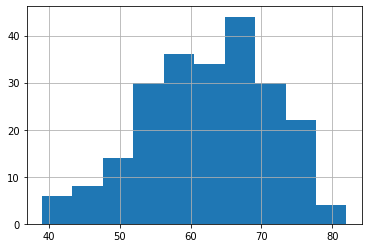

In [6]:
data["age"].hist()

In [18]:
df_num = data.select_dtypes(include = ['float64', 'int64'])
df_num.head()

,Unnamed: 0,inst,time,status,age,sex,ph.ecog,ph.karno,pat.karno,meal.cal,wt.loss
0,1,3.0,306,2,74,1,1.0,90.0,100.0,1175.0,NaN
1,2,3.0,455,2,68,1,0.0,90.0,90.0,1225.0,15.0
2,3,3.0,1010,1,56,1,0.0,90.0,90.0,NaN,15.0
3,4,5.0,210,2,57,1,1.0,90.0,60.0,1150.0,11.0
4,5,1.0,883,2,60,1,0.0,100.0,90.0,NaN,0.0


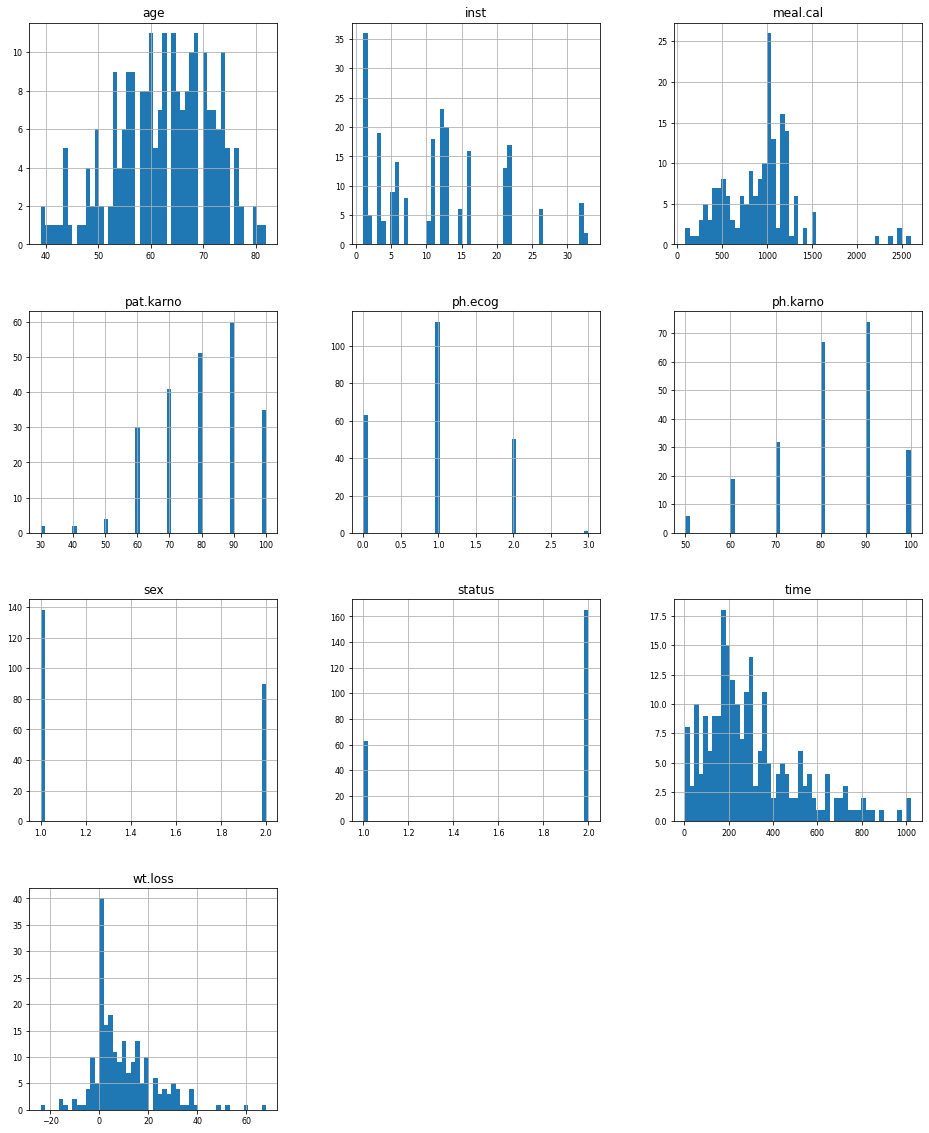

In [50]:
df_num[df_num.columns[1:]].hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8); # ; avoid having the matplotlib verbose informations

count    228.000000
mean      62.447368
std        9.073457
min       39.000000
25%       56.000000
50%       63.000000
75%       69.000000
max       82.000000
Name: age, dtype: float64


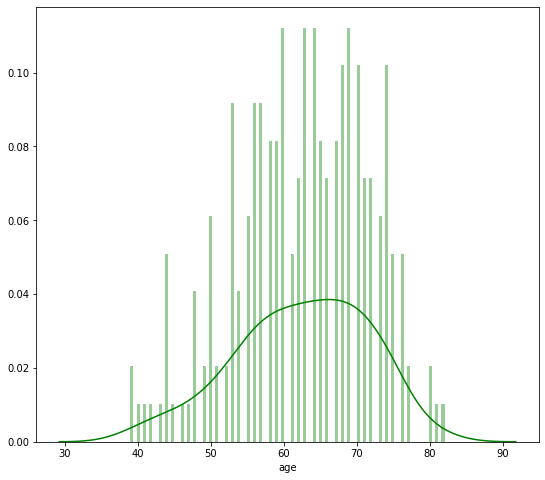

In [11]:
print(data['age'].describe())
plt.figure(figsize=(9, 8))
sns.distplot(data['age'], color='g', bins=100, hist_kws={'alpha': 0.4});

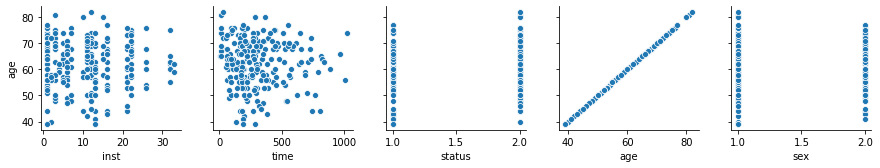

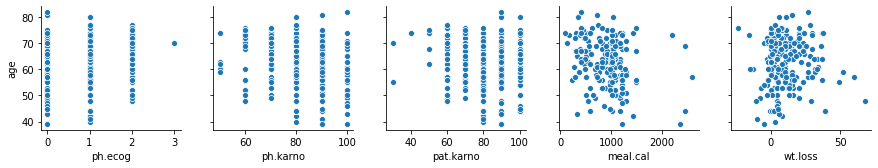

In [33]:
for i in range(1, len(df_num.columns), 5):
    sns.pairplot(data=df_num,
                x_vars=df_num.columns[i:i+5],
                y_vars=['age'])

In [20]:
kmf = KaplanMeierFitter()

In [21]:
# Organize our data :
# If status = 1 , then dead = 0
# If status = 2 , then dead = 1
data.loc[data.status == 1, 'dead'] = 0
data.loc[data.status == 2, 'dead'] = 1
print (data.head())

   Unnamed: 0  inst  time  status  age  sex  ph.ecog  ph.karno  pat.karno  \
0           1   3.0   306       2   74    1      1.0      90.0      100.0   
1           2   3.0   455       2   68    1      0.0      90.0       90.0   
2           3   3.0  1010       1   56    1      0.0      90.0       90.0   
3           4   5.0   210       2   57    1      1.0      90.0       60.0   
4           5   1.0   883       2   60    1      0.0     100.0       90.0   

   meal.cal  wt.loss  dead  
0    1175.0      NaN   1.0  
1    1225.0     15.0   1.0  
2       NaN     15.0   0.0  
3    1150.0     11.0   1.0  
4       NaN      0.0   1.0  


In [22]:
data.head()

,Unnamed: 0,inst,time,status,age,sex,ph.ecog,ph.karno,pat.karno,meal.cal,wt.loss,dead
0,1,3.0,306,2,74,1,1.0,90.0,100.0,1175.0,NaN,1.0
1,2,3.0,455,2,68,1,0.0,90.0,90.0,1225.0,15.0,1.0
2,3,3.0,1010,1,56,1,0.0,90.0,90.0,NaN,15.0,0.0
3,4,5.0,210,2,57,1,1.0,90.0,60.0,1150.0,11.0,1.0
4,5,1.0,883,2,60,1,0.0,100.0,90.0,NaN,0.0,1.0


In [23]:
# Fit the data into model.
# The 1st arg accepts an array or pd.Series of individual survival times
# The 2nd arg accepts an array or pd.Series that indicates if the event 
# interest (or death) occured.
kmf.fit(durations =  data["time"], event_observed = data["dead"])

<lifelines.KaplanMeierFitter:"KM_estimate", fitted with 228 total observations, 63 right-censored observations>

In [24]:
# Print the event table
# Removed = Observed + Censored
# Censored = Person that didn't die.(They are of no use to us!)
# Observed = Persons that died.
print (kmf.event_table)

          removed  observed  censored  entrance  at_risk
event_at                                                
0.0             0         0         0       228      228
5.0             1         1         0         0      228
11.0            3         3         0         0      227
12.0            1         1         0         0      224
13.0            2         2         0         0      223
...           ...       ...       ...       ...      ...
840.0           1         0         1         0        5
883.0           1         1         0         0        4
965.0           1         0         1         0        3
1010.0          1         0         1         0        2
1022.0          1         0         1         0        1

[187 rows x 5 columns]


In [25]:
# Calculating survival probability by hand :
event_at_0 = kmf.event_table.iloc[0,:]
# Calculate the survival probability for t=0
surv_for_0 = (event_at_0.at_risk - event_at_0.observed)/event_at_0.at_risk
surv_for_0

1.0

In [26]:
# Calculating survival probability by hand :
event_at_5 = kmf.event_table.iloc[1,:]
# Calculate the survival probability for t=0
surv_for_5 = (event_at_5.at_risk - event_at_5.observed)/event_at_5.at_risk
surv_for_5

0.9956140350877193

In [27]:
# Calculating survival probability by hand :
event_at_11 = kmf.event_table.iloc[2,:]
# Calculate the survival probability for t=0
surv_for_11 = (event_at_11.at_risk - event_at_11.observed)/event_at_11.at_risk
surv_for_11

0.986784140969163

In [28]:
# Calculating actual probabilities :
surv_after_5 = surv_for_0 * surv_for_5
surv_after_11 = surv_for_0 * surv_for_5 * surv_for_11
print (surv_after_5)
print (surv_after_11)

0.9956140350877193
0.9824561403508771


In [29]:
# Our kmf object has done all these calculations for us :
print (kmf.predict(11))

0.9824561403508766


In [30]:
# For an array :
print (kmf.predict([0,5,11,12]))

0     1.000000
5     0.995614
11    0.982456
12    0.978070
Name: KM_estimate, dtype: float64


In [31]:
# To get full list :
print (kmf.survival_function_)

          KM_estimate
timeline             
0.0          1.000000
5.0          0.995614
11.0         0.982456
12.0         0.978070
13.0         0.969298
...               ...
840.0        0.067127
883.0        0.050346
965.0        0.050346
1010.0       0.050346
1022.0       0.050346

[187 rows x 1 columns]


In [32]:
# It provides the number of days where on average 50% of patients died.
print (kmf.median_survival_time_)

310.0


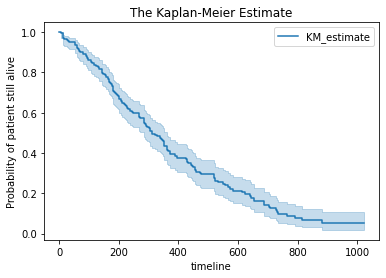

In [34]:
# Plot the graph :
kmf.plot()
plt.title("The Kaplan-Meier Estimate")
plt.ylabel("Probability of patient still alive")
plt.show()

In [35]:
print (kmf.confidence_interval_)

        KM_estimate_lower_0.95  KM_estimate_upper_0.95
0.0                   1.000000                1.000000
5.0                   0.969277                0.999381
11.0                  0.953935                0.993379
12.0                  0.948120                0.990813
13.0                  0.936682                0.985244
...                        ...                     ...
840.0                 0.030728                0.123060
883.0                 0.017866                0.108662
965.0                 0.017866                0.108662
1010.0                0.017866                0.108662
1022.0                0.017866                0.108662

[187 rows x 2 columns]


In [36]:
# Probabaility of die :
# p(1022) = p(0) +......+p(1022)
print (kmf.cumulative_density_)

          KM_estimate
timeline             
0.0          0.000000
5.0          0.004386
11.0         0.017544
12.0         0.021930
13.0         0.030702
...               ...
840.0        0.932873
883.0        0.949654
965.0        0.949654
1010.0       0.949654
1022.0       0.949654

[187 rows x 1 columns]
